# Appendix I

## HW3 - Analyzing Cell Cluster Data With Random Forest

### By Alexander Pena

#### Assisted by: Ted

# Library imports

In [144]:
import os
import warnings
from IPython import display
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Data

## Data Import

First will look at the e1_positive.csv dataset

In [2]:
df = pd.read_csv("i1 positive.csv")
df

,GABRG2,CELF4,SRRM4,SLC1A3,ATP1A3,RBFOX3,GABRA4,NHSL1,GRAMD3,SEZ6L2,...,FERMT1,CSPG4,GJA1,LAMA1,YAP1,LINC00639.2,SMOC1,LINC00498,GFRA1,Label
0,35.038262,161.176004,68.074337,58.063405,20.021864,269.294069,188.205520,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.001093,0.0,0.0,0
1,95.324867,75.256474,87.297510,0.000000,18.061554,342.166102,683.328784,0.000000,0.0,1.003420,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.003420,0.0,0.0,0
2,220.143867,187.976727,42.219372,106.553653,0.000000,187.976727,299.556496,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,7.036562,0.000000,0.0,0.0,0
3,166.010840,26.159284,61.373704,0.000000,30.183789,254.549955,446.720079,0.000000,0.0,25.153158,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.006126,0.0,0.0,0
4,188.426220,71.160966,119.269788,57.129226,16.036274,265.600789,287.650666,24.054411,0.0,1.002267,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,665.606813,101.002551,4.040102,0.000000,95.952424,10.100255,79.792016,0.000000,0.0,192.914873,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.010026,0.0,0.0,0
867,21.157688,45.337903,18.135161,1.007509,290.162582,14.105125,0.000000,3.022527,0.0,64.480574,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0
868,4.111466,81.201453,1704.202638,2.055733,9.250798,75.034254,238.465025,1.027866,0.0,1.027866,...,0.0,0.0,0.0,0.0,0.0,1.027866,0.000000,0.0,0.0,0
869,37.480576,438.624037,0.000000,0.000000,69.896209,3.038966,66.857244,0.000000,0.0,130.675522,...,0.0,0.0,0.0,0.0,0.0,0.000000,252.234146,0.0,0.0,0


## Dataset Characteristics

All the samples in the dataset are numeric

### Number of samples 

In [3]:
print('Number of samples:', df.shape[0])

Number of samples: 871


### Number of each label

In [4]:
print('Number of 0 labels: ', len(df[df.Label==0]))
print('Number of 1 labels: ', len(df[df.Label==1]))

Number of 0 labels:  781
Number of 1 labels:  90


### Datatype

### Range of Data

In [5]:
print('Biggest value in the dataset:', df.min().min())
print('Biggest value in the dataset:', df.max().max())
print('Mean of all the means:', df.mean().mean())
print('Standard Deviation of all the standard deviations:', df.std().std())

Biggest value in the dataset: 0.0
Biggest value in the dataset: 11405.4695
Mean of all the means: 56.448339872720446
Standard Deviation of all the standard deviations: 118.98586594987398


### How many values are just zeros?

In [6]:
vals = []
for index, row in df.iterrows():
    vals.append(row[row == 0].value_counts()[0])
num_zeroes = pd.Series(vals)
print('Mean number of zeroes between features:', num_zeroes.mean())
print('Standard Deviation of the number of zeroes between features:', num_zeroes.std())

Mean number of zeroes between features: 356.40872560275545
Standard Deviation of the number of zeroes between features: 53.02767108583817


### Checking Proportions of '0' Labels to '1' Labels in dataset

In [7]:
value_counts = df['Label'].value_counts()
print('Percent of 0 from total', value_counts[0]/df.shape[0])
print('Percent of 1 from total', value_counts[1]/df.shape[0])
print('Making sure the proportions add up to 1:')
value_counts[0]/df.shape[0] + value_counts[1]/df.shape[0]

Percent of 0 from total 0.8966704936854191
Percent of 1 from total 0.10332950631458095
Making sure the proportions add up to 1:


1.0

# Trainning on 0.75% and testing on 0.25% 
Once I have gotten the metrics for this phase, the next phase starts over but instead uses 3-Fold Cross Validation. This is done to compare the results.

### Shuffling and Splitting dataset to x for the features and y for the labels

x and y will be used throughout the project
- On train test split for phase 1
- During Cross Validation to break up x and y into 3 chunks

In [8]:
from sklearn.utils import shuffle
df = shuffle(df)

x = df.drop('Label', axis=1)
y = df['Label']

## Split the data into trainning set and testing set

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.25,
    #random_state=0
    shuffle=True,
    stratify=y
)

The stratify parameter ensurse proportions of 0 and 1 are maintained in both training and testing set.

Making sure there is roughly the same proportion of labels as the original dataset. \
Original dataset had 8.67777 times more 0 than 1

## Hyperparameter Tuning

The hyperparameters in the random forest model are either used to increase the predictive power of the model or to make the model faster. 

| Hyperparameter    | Description
|-------------------|:----------
| n_estimators      | number of trees in the forest 
| max_features      | Sets the number of features to select when bootstrapping
| Bootstrap         | Bootstrap=True (default) samples are drawn with replacement 
| random_state      | generated random numbers for the random forest.

### Setting grid ranges

In [10]:
import math
from sklearn.metrics import f1_score, make_scorer

num_features = df.shape[1]
target_max_features = int(math.sqrt(num_features))
grid_ranges = {
    'n_estimators': [500, 1000],
    'max_features': np.arange(target_max_features - 5, target_max_features + 5, 1),
    #'max_features': [target_max_features],
    'bootstrap': [True],
    'oob_score': [True],
    'random_state': [1] # for testing
}
clf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=grid_ranges,
    cv=3,
    n_jobs=-1,
    verbose=1,
)

## Fitting the Random Forest Classifier

Because we used GridSearchCV, when we fit the classifier, it will automatically do a grid search to find the best hyperparameters

In [123]:
clf.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_features': array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
                         'n_estimators': [500, 1000], 'oob_score': [True],
                         'random_state': [1]},
             verbose=1)

In [12]:
best_parameters = clf.best_params_
print(best_parameters)

{'bootstrap': True, 'max_features': 28, 'n_estimators': 500, 'oob_score': True, 'random_state': 1}


## Predict with test set

In [128]:
predictions = clf.predict(x_test)

## Metrics

### Accuracy Confusion Matrix

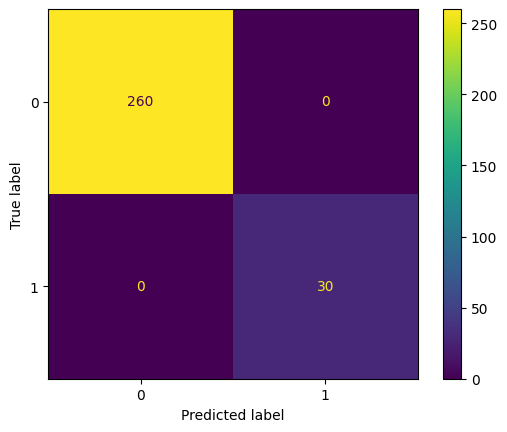

In [147]:
''' it will predict perfectly since it was trained on it '''
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

### Accuracy Score

In [15]:
print('Accuracy Score:', accuracy_score(y_test, predictions))

Accuracy Score: 0.9862385321100917


In [16]:
### Precision, Recall, f1-score

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       195
           1       1.00      0.87      0.93        23

    accuracy                           0.99       218
   macro avg       0.99      0.93      0.96       218
weighted avg       0.99      0.99      0.99       218



We can see that the matrix incorrectly classified 3 samples. All of the misclassifications were False Negatives. This will affect the recall because the classifier is missing there instances of positive samples for 1.

### Out of Bag Error - OOB

In [18]:
no_cv_oob = clf.best_estimator_.oob_score_
print('Out of Bag Score is:', no_cv_oob)
print('Out of Bag Error is:', 1 - no_cv_oob)

Out of Bag Score is: 0.9816232771822359
Out of Bag Error is: 0.018376722817764146


### ROC Curve

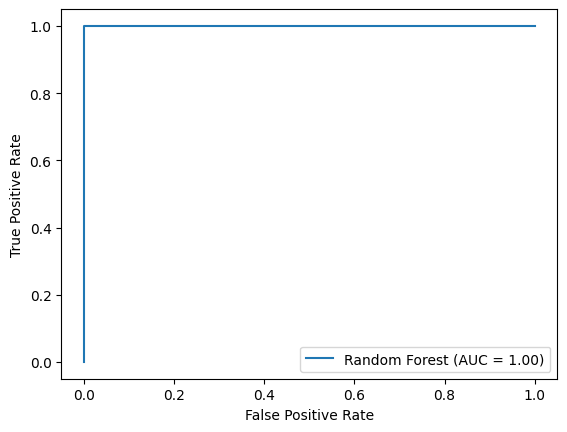

In [146]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
clf_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
clf_disp.plot()

# Cross Validation

Now let us use Cross Validation to Split the dataset and train with 3-fold CV

## Splitting the data 3 ways

There is an awesome method in SciKit-Learn that will partition the dataset into 3 folds and at the same time maintain the proportions of 0 to 1 labels

In [19]:
''' First split the data 3 ways '''
from sklearn.model_selection import StratifiedKFold

#first_third = df.iloc[:df.shape[0]//3]
#second_third = df.iloc[df.shape[0]//3 : 2*df.shape[0]//3]
#third_third = df.iloc[df.shape[0]//3*2 : ]

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

idx = 0
folds = []
#pd.DataFrame(columns=df.columns)

print('total samples', x.shape[0])

for train_index, test_index in skf.split(x, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #folds = pd.concat([folds, df.iloc[train_index]], axis=0)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    folds.append(df.iloc[test_index])
    
    #folds.append(df.iloc[x_train])

first_third   = folds[0]
second_third  = folds[1]
third_third   = folds[2]


total samples 871


Making sure the data got split correctly:

In [20]:
print('Checking to make sure all thirds add up to the total')
print('sum of thirds', first_third.shape[0] + second_third.shape[0] + third_third.shape[0])


print('the proportions should be around 90% labeled with 0: ')
print(first_third['Label'].value_counts()[0]/(first_third['Label'].value_counts()[0] + first_third['Label'].value_counts()[1]))
print(second_third['Label'].value_counts()[0]/(first_third['Label'].value_counts()[0] + first_third['Label'].value_counts()[1]))
print(third_third['Label'].value_counts()[0]/(first_third['Label'].value_counts()[0] + first_third['Label'].value_counts()[1]))
print('Looks perfect, now we got our three partitions stratified with their original proportions')

Checking to make sure all thirds add up to the total
sum of thirds 871
the proportions should be around 90% labeled with 0: 
0.8969072164948454
0.8934707903780069
0.8934707903780069
Looks perfect, now we got our three partitions stratified with their original proportions


<b>Here I am preparing the random forest classifier with a grid search so it will be ready to tune and fit</b>

In [21]:
grid_ranges = {
    'n_estimators': [500, 1000],
    'max_features': np.arange(target_max_features - 5, target_max_features + 5, 1),
    'bootstrap': [True],
    'oob_score': [True],
    'random_state': [1] # For reporting purposes
}
clf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=grid_ranges,
    cv=3,
    n_jobs=-1,
    verbose=1
)

## First Repetition

### Trainning on first Two-folds

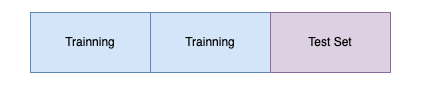

In [22]:
display.Image('./first_repetition.png')

In [23]:
''' Trainning on First Two Folds '''
x_train = pd.concat([first_third, second_third]).drop('Label', axis=1)
y_train = pd.concat([first_third, second_third])['Label']
clf.fit(x_train , y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_features': array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
                         'n_estimators': [500, 1000], 'oob_score': [True],
                         'random_state': [1]},
             verbose=1)

In [81]:
clf.best_params_

{'bootstrap': True,
 'max_features': 28,
 'n_estimators': 500,
 'oob_score': True,
 'random_state': 1}

### Testing on 3rd Fold

In [24]:
first_predictions = clf.predict(third_third.drop('Label', axis=1))

### Metrics

#### Confusion Matrix

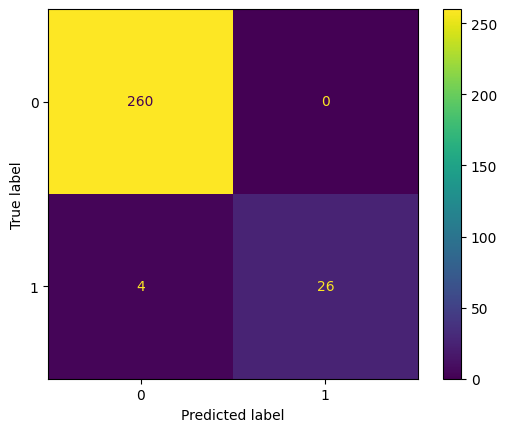

In [25]:
cm = confusion_matrix(third_third['Label'], first_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

#### Accuracy Score

In [26]:
first_accuracy_score = accuracy_score(first_predictions, third_third['Label'])
print('Accuracy Score', first_accuracy_score)

Accuracy Score 0.9862068965517241


#### Precision, Recall, f1-score

In [27]:
from sklearn.metrics import classification_report
print(classification_report(third_third['Label'], first_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       260
           1       1.00      0.87      0.93        30

    accuracy                           0.99       290
   macro avg       0.99      0.93      0.96       290
weighted avg       0.99      0.99      0.99       290



We can see that the matrix incorrectly classified 3 samples. All of the misclassifications were False Negatives. This will affect the recall because the classifier is missing there instances of positive samples for 1.

#### Out of Bag Error

In [28]:
first_oob = clf.best_estimator_.oob_score_
first_oob

0.9810671256454389

#### ROC Curve

### ROC Curve

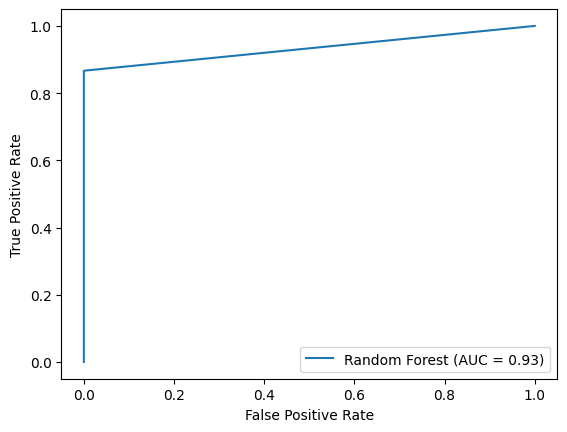

In [152]:
fpr, tpr, thresholds = metrics.roc_curve(third_third['Label'], first_predictions)
roc_auc = metrics.auc(fpr, tpr)
clf_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
clf_disp.plot()

## Second Repetition

### Trainning on first and third fold

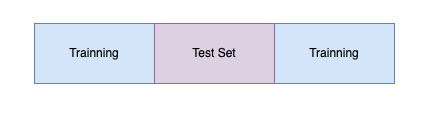

In [29]:
display.Image('./second_repetition.png')

In [78]:
''' Trainning on First and Third Folds, clf.fit also includes a new grid search for hyperparameters'''
x_train = pd.concat([first_third, third_third]).drop('Label', axis=1)
y_train = pd.concat([first_third, third_third])['Label']
clf.fit(x_train, y_train) # fitting again untrains previous fit which is what we want

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_features': array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
                         'n_estimators': [500, 1000], 'oob_score': [True],
                         'random_state': [1]},
             verbose=1)

In [79]:
clf.best_params_

{'bootstrap': True,
 'max_features': 28,
 'n_estimators': 500,
 'oob_score': True,
 'random_state': 1}

### Testing on 2nd Fold

In [31]:
second_predictions = clf.predict(second_third.drop('Label', axis=1))

### Metrics

#### Confusion Matrix

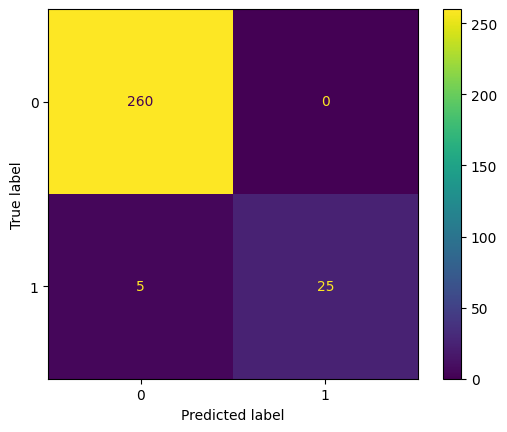

In [32]:
cm = confusion_matrix(second_third['Label'], second_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

#### Accuracy Score

In [33]:
second_accuracy_score = accuracy_score(second_predictions, second_third['Label'])
print('accuracy_score', second_accuracy_score)

accuracy_score 0.9827586206896551


#### Precision, Recall, f1-score

In [34]:
from sklearn.metrics import classification_report
print(classification_report(second_third['Label'], second_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       260
           1       1.00      0.83      0.91        30

    accuracy                           0.98       290
   macro avg       0.99      0.92      0.95       290
weighted avg       0.98      0.98      0.98       290



We can see that the matrix incorrectly classified 6 samples. All of the misclassifications were False Negatives. This will affect the recall because the classifier is missing there instances of positive samples for 1.

#### Out of Bag Error

In [35]:
second_oob = clf.best_estimator_.oob_score_
second_oob_eeror = 1 - second_oob
print('The oob score is:', second_oob)
print('The OOB error is:', second_oob_eeror)

The oob score is: 0.9759036144578314
The OOB error is: 0.02409638554216864


### ROC Curve

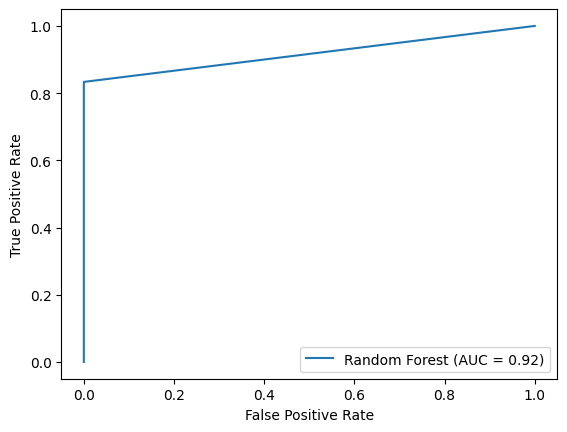

In [151]:
fpr, tpr, thresholds = metrics.roc_curve(second_third['Label'], second_predictions)
roc_auc = metrics.auc(fpr, tpr)
clf_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
clf_disp.plot()

## Third Repetition

### Trainning on second and third fold

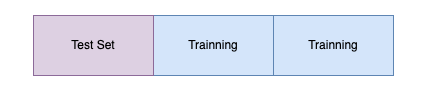

In [36]:
display.Image('./third_repetition.png')

In [82]:
''' Trainning on last Two Folds '''
x_train = pd.concat([second_third, third_third]).drop('Label', axis=1)
y_train = pd.concat([second_third, third_third])['Label']
clf.fit(x_train , y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_features': array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
                         'n_estimators': [500, 1000], 'oob_score': [True],
                         'random_state': [1]},
             verbose=1)

In [84]:
clf.best_params_

{'bootstrap': True,
 'max_features': 21,
 'n_estimators': 1000,
 'oob_score': True,
 'random_state': 1}

### Testing on 1st Fold

In [38]:
third_predictions = clf.predict(first_third.drop('Label', axis=1))

### Metrics

#### Confusion Matrix

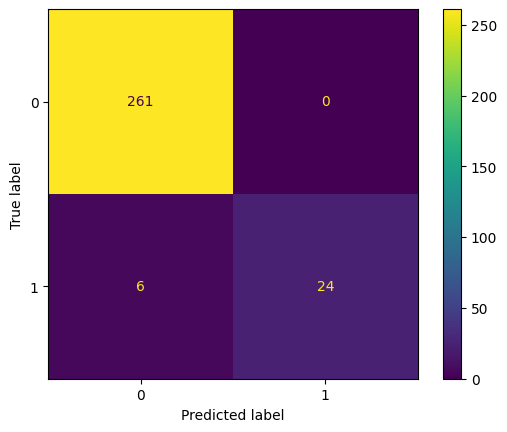

In [39]:
cm = confusion_matrix(first_third['Label'], third_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

#### Accuracy Score

In [40]:
third_accuracy_score = accuracy_score(third_predictions, first_third['Label'])
print('Accuracy Score', third_accuracy_score)

Accuracy Score 0.979381443298969


#### Precision, Recall, f1-score

In [41]:
from sklearn.metrics import classification_report
print(classification_report(first_third['Label'], third_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       261
           1       1.00      0.80      0.89        30

    accuracy                           0.98       291
   macro avg       0.99      0.90      0.94       291
weighted avg       0.98      0.98      0.98       291



We can see that the matrix incorrectly classified 6 samples. All of the misclassifications were False Negatives. This will affect the recall because the classifier is missing there instances of positive samples for 1.

In [42]:
third_oob = clf.best_estimator_.oob_score_
print('The OOB score is:', third_oob)
print('The OOB Error is :,', 1 - third_oob)

The OOB score is: 0.9827586206896551
The OOB Error is :, 0.017241379310344862


### ROC Curve

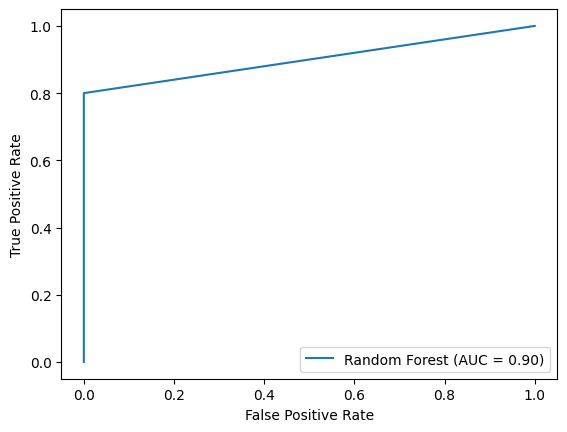

In [153]:
fpr, tpr, thresholds = metrics.roc_curve(first_third['Label'], third_predictions)
roc_auc = metrics.auc(fpr, tpr)
clf_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
clf_disp.plot()

## Metrics of all Three folds

### Average Accuracy Score

In [43]:
average_accuracy = (first_accuracy_score + second_accuracy_score + third_accuracy_score)/3
print('Average Accuracy', average_accuracy)

Average Accuracy 0.9827823201801161


### Average OOB Score vs No CV OOB Score

In [44]:
average_oob = (first_oob + second_oob + third_oob)/3
print('Average oob of all 3 folds:', average_oob)
print('Average oob when trained on entire dataset:', no_cv_oob)
print('Wow! They are very similar! This shows that RF has built in CV')

Average oob of all 3 folds: 0.9799097869309752
Average oob when trained on entire dataset: 0.9816232771822359
Wow! They are very similar! This shows that RF has built in CV


# Using Best Trained Random Forest

I will use the OOB to select the best trained RF out of the three

In [59]:
print('first_oob,', first_oob)
print('second_oob,', second_oob)
print('third_oob,', third_oob)
print('Looks like third RF has best OOB so we will select that one \
to do a runtime test and feature ranking')
best_oob = max(first_oob, second_oob, third_oob)

first_oob, 0.9810671256454389
second_oob, 0.9759036144578314
third_oob, 0.9827586206896551
Looks like third RF has best OOB so we will select that one to do a runtime test and feature ranking


## Best Parameters for the Best RF

In [60]:
clf.best_params_

{'bootstrap': True,
 'max_features': 21,
 'n_estimators': 1000,
 'oob_score': True,
 'random_state': 1}

### Cut Off (I am keeping it at 0.5)
- Change the cutoff from anyhwere to 0 and 1
- The model should be already trained and is the variable 'model'
- The default value is 0.5

In [61]:
cutoff = 0.5
y_pred_threshold = (clf.predict_proba(x_train)[:, 1] > cutoff).astype('float')
# Confusion Matrix of the results with change in cutoff
#confusion_matrix(y_test, y_pred_threshold)

### Taking a single positive and negative sample

## Negative Sample

In [62]:
index = 0 # index of sample to predict
singe_sample = [x_test.iloc[index].to_numpy()]


In [63]:
%%time
with warnings.catch_warnings(record=True):
    single_predict = clf.predict(single_sample)

CPU times: user 114 ms, sys: 13.3 ms, total: 127 ms
Wall time: 119 ms


In [69]:
print('predicted:', single_predict[0], ' actual', y_train.iloc[index])

predicted: 0  actual 0


## Positive Sample

In [120]:
index = 11# index of sample to predict
single_sample = [x_test.iloc[index].to_numpy()]

In [118]:
%%time
with warnings.catch_warnings(record=True):
    single_predict = clf.predict(single_sample)

CPU times: user 255 ms, sys: 15.6 ms, total: 271 ms
Wall time: 263 ms


In [121]:
print('predicted:', single_predict[0], ' actual', first_third['Label'].iloc[index])

predicted: 0  actual 1


## Feature Ranking

In [75]:
''' First extracting feature rankings and standardizing '''
# Standardize Importances
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std = clf.best_estimator_.feature_importances_
feature_names = list(x_train.columns)
features_dict = {key: val for key, val in zip(feature_names, std)}
feature_rankings = {k: v for k, v in sorted(features_dict.items(), key=lambda item: item[1], reverse=True)}
feature_rankings_list = list(feature_rankings.items())

## Plotting the Feature Ranking of top 10

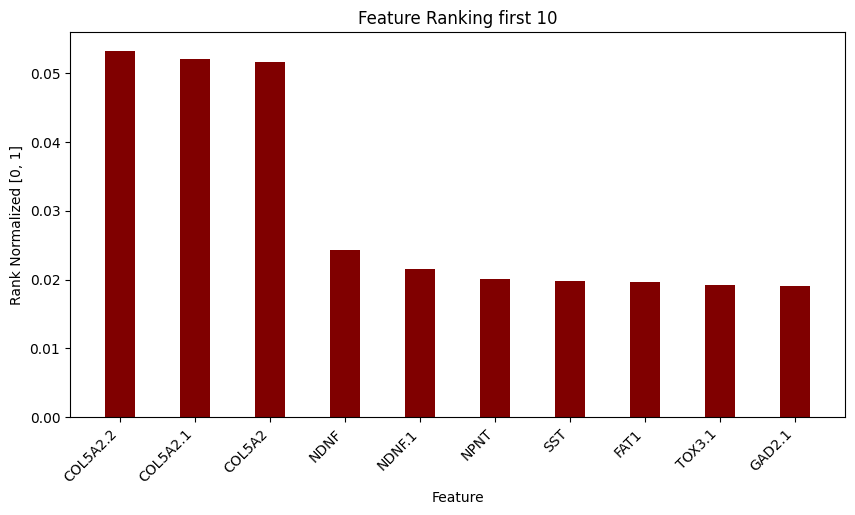

In [76]:
import matplotlib.pyplot as plt

# number of features to compare

n = 10
target_features = feature_rankings_list[:n]
feature_names = [tup[0] for tup in target_features]
feature_values = [tup[1] for tup in target_features]

fig = plt.figure(figsize = (10, 5))

plt.xticks(rotation=45, ha='right')

# creating the bar plot
plt.bar(feature_names, feature_values, color ='maroon',
        width = 0.4)

plt.xlabel('Feature')
plt.ylabel('Rank Normalized [0, 1]')
plt.title(f'Feature Ranking first {n}')

plt.show()
           

## Plotting the Feature Ranking of top 20 (For Fun)

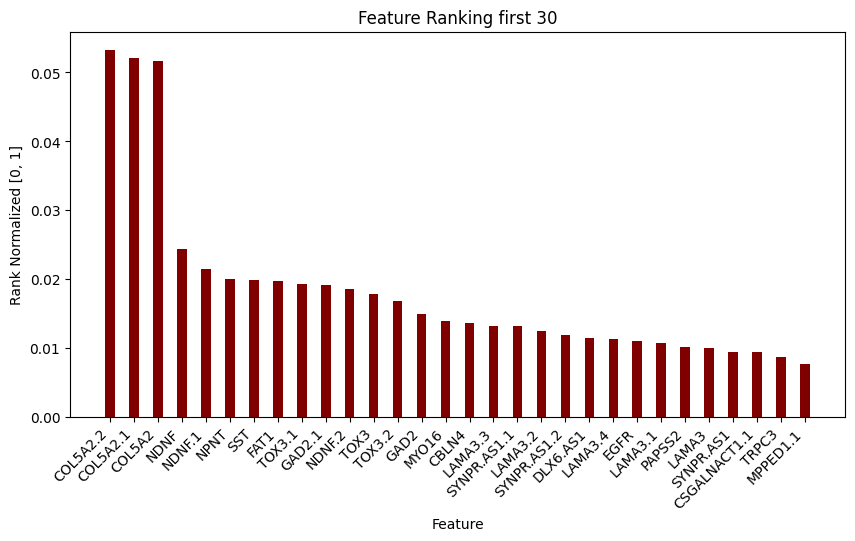

In [77]:
import matplotlib.pyplot as plt

# number of features to compare

n = 30
target_features = feature_rankings_list[:n]
feature_names = [tup[0] for tup in target_features]
feature_values = [tup[1] for tup in target_features]

fig = plt.figure(figsize = (10, 5))

plt.xticks(rotation=45, ha='right')

# creating the bar plot
plt.bar(feature_names, feature_values, color ='maroon',
        width = 0.4)

plt.xlabel('Feature')
plt.ylabel('Rank Normalized [0, 1]')
plt.title(f'Feature Ranking first {n}')

plt.show()
           

# References

https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

I also referenced quickly many stack overflow posts